In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv('news.csv')

# Check the dataset structure
print(df.head())

# Preprocess the data
X = df['text']  # Assuming 'text' column contains the news content
y = df['label']  # Assuming 'label' column contains the REAL/FAKE labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import PassiveAggressiveClassifier

# Create the vectorizer and model pipeline
pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    PassiveAggressiveClassifier(max_iter=50)
)

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('passiveaggressiveclassifier',
                 PassiveAggressiveClassifier(max_iter=50))])

Accuracy: 0.9345
              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93       628
        REAL       0.94      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



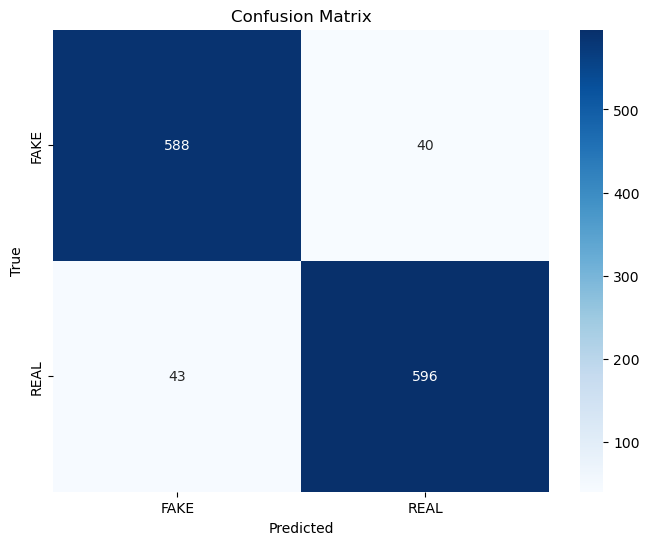

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


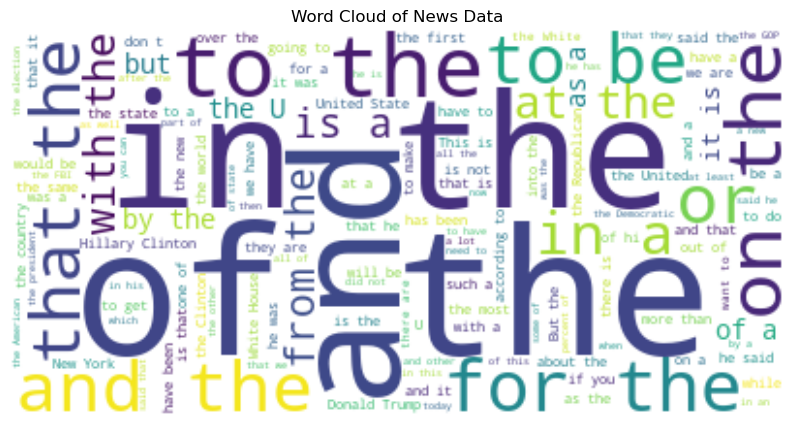

In [4]:
from wordcloud import WordCloud

# Combine all texts into one string
text = ' '.join(df['text'])

# Generate word cloud
wordcloud = WordCloud(stopwords='english', background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Data')
plt.show()


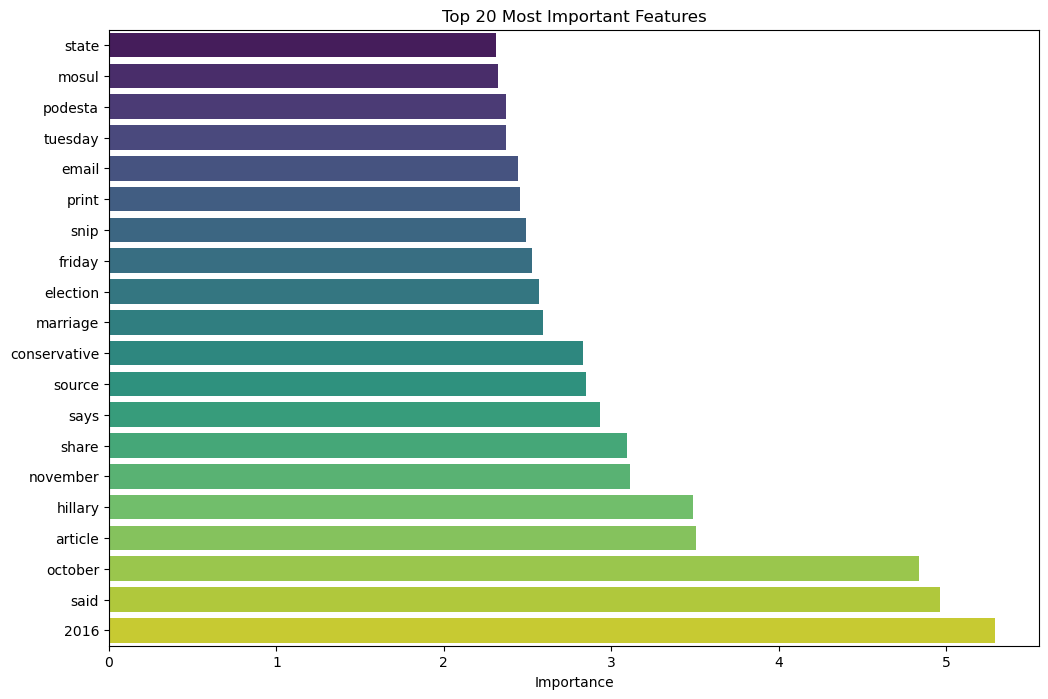

In [5]:
import numpy as np

# Get the vectorizer and model from the pipeline
vectorizer = pipeline.named_steps['tfidfvectorizer']
model = pipeline.named_steps['passiveaggressiveclassifier']

# Get feature names and their importance scores
feature_names = np.array(vectorizer.get_feature_names_out())
importance = np.abs(model.coef_[0])
top_n = 20

# Get top N features
top_indices = np.argsort(importance)[-top_n:]
top_features = feature_names[top_indices]
top_importance = importance[top_indices]

# Plot bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_importance, y=top_features, palette='viridis')
plt.xlabel('Importance')
plt.title('Top 20 Most Important Features')
plt.show()
